In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
baseline_retriever = {
    "Recall@5": 0.42,
    "Recall@10": 0.55,
    "Recall@20": 0.68,
    "HitRate@5": 0.60,
    "HitRate@10": 0.72,
    "HitRate@20": 0.81,
    "MRR": 0.31,
    "nDCG@10": 0.36
}

trained_retriever = {
    "Recall@5": 0.55,
    "Recall@10": 0.68,
    "Recall@20": 0.81,
    "HitRate@5": 0.71,
    "HitRate@10": 0.83,
    "HitRate@20": 0.91,
    "MRR": 0.38,
    "nDCG@10": 0.44
}

retriever_reranker = {
    "Recall@20": 0.80,
    "HitRate@20": 0.90,
    "MRR": 0.52,
    "nDCG@10": 0.61
}


In [3]:
df = pd.DataFrame([
    baseline_retriever,
    trained_retriever,
    retriever_reranker
], index=[
    "Baseline Retriever",
    "Trained Retriever",
    "Retriever + Reranker"
])

df


,Recall@5,Recall@10,Recall@20,HitRate@5,HitRate@10,HitRate@20,MRR,nDCG@10
Baseline Retriever,0.42,0.55,0.68,0.60,0.72,0.81,0.31,0.36
Trained Retriever,0.55,0.68,0.81,0.71,0.83,0.91,0.38,0.44
Retriever + Reranker,NaN,NaN,0.80,NaN,NaN,0.90,0.52,0.61


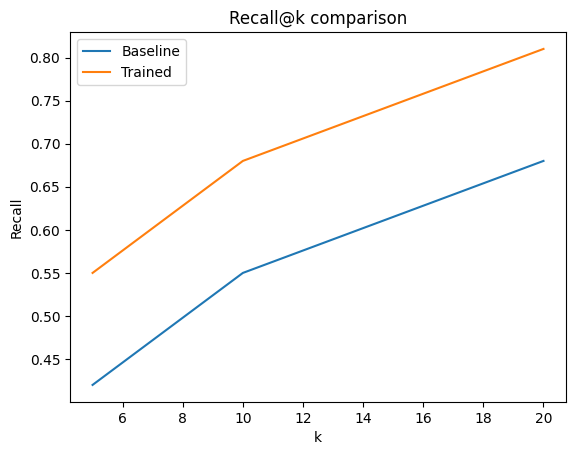

In [4]:
ks = [5, 10, 20]

plt.figure()
plt.plot(ks, [baseline_retriever[f"Recall@{k}"] for k in ks], label="Baseline")
plt.plot(ks, [trained_retriever[f"Recall@{k}"] for k in ks], label="Trained")
plt.legend()
plt.xlabel("k")
plt.ylabel("Recall")
plt.title("Recall@k comparison")
plt.savefig("../images/recall_at_k.png")
plt.show()


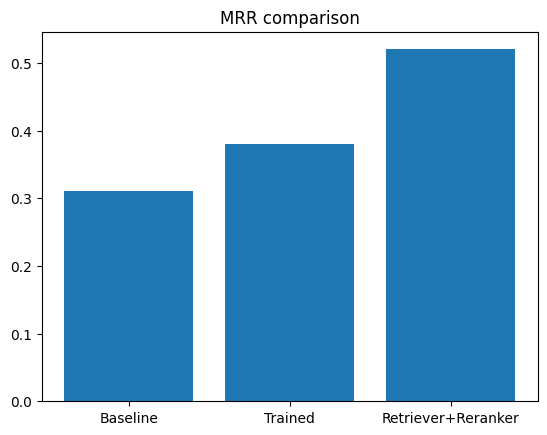

In [5]:
plt.figure()
plt.bar(
    ["Baseline", "Trained", "Retriever+Reranker"],
    [
        baseline_retriever["MRR"],
        trained_retriever["MRR"],
        retriever_reranker["MRR"]
    ]
)
plt.title("MRR comparison")
plt.savefig("../images/mrr.png")
plt.show()


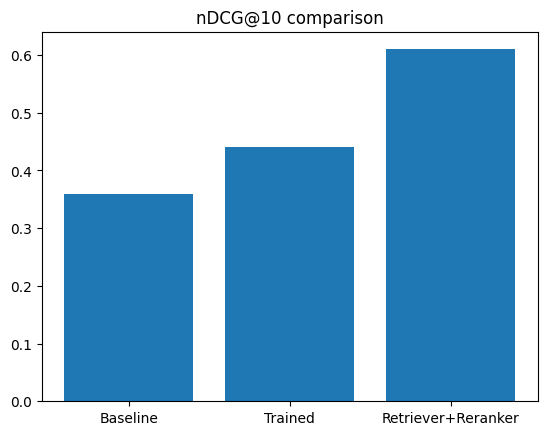

In [6]:
plt.figure()
plt.bar(
    ["Baseline", "Trained", "Retriever+Reranker"],
    [
        baseline_retriever["nDCG@10"],
        trained_retriever["nDCG@10"],
        retriever_reranker["nDCG@10"]
    ]
)
plt.title("nDCG@10 comparison")
plt.savefig("../images/ndcg.png")
plt.show()
